In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
!echo $CUDA_VISIBLE_DEVICES

1


In [2]:
import sys
sys.path.insert(0, "../")

import os
os.chdir("../")

In [3]:
from examples.qm9_no_h import *
from examples.train import plot_sample_hist, eval_fn
import yaml
import matplotlib.pyplot as plt
import jax.numpy as jnp

/scratch/lim24/augmented-equivariant-flows/examples/train.py:10: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
2023-02-08 21:45:48.580906: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-08 21:45:48.581059: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-08 21:45:48.581075: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

In [4]:
USE_64_BIT = False
if USE_64_BIT:
    from jax.config import config
    config.update("jax_enable_x64", True)

In [5]:
cfg = DictConfig(yaml.safe_load(open("examples/config/qm9_no_h.yaml")))
cfg

{'hydra': {'job': {'chdir': False}}, 'flow': {'dim': 3, 'nodes': 9, 'n_layers': 8, 'identity_init': True, 'type': 'proj_v2', 'fast_compile': True, 'compile_n_unroll': 1, 'egnn': {'emile_net': False, 'mlp_units': [32, 32], 'n_layers': 3, 'normalize_by_norms': True, 'variance_scaling_init': 0.001, 'tanh': True, 'agg': 'mean', 'phi_x_max': 1.0, 'normalization_constant': 1.0, 'h': {'linear_softmax': True, 'share_h': True}}, 'transformer': {'mlp_units': [32, 32], 'num_heads': 6, 'key_size': 16, 'w_init_scale': 0.1, 'n_layers': 3}}, 'training': {'lr': '2e-5', 'optimizer_name': 'adam', 'n_epoch': 200, 'batch_size': 32, 'plot_batch_size': 32, 'max_global_norm': 20000, 'seed': 0, 'reload_aug_per_epoch': True, 'train_set_size': None, 'test_set_size': None, 'n_plots': 10, 'n_checkpoints': 8, 'n_eval': 12, 'K_marginal_log_lik': 20, 'save': True, 'save_dir': 'qm9pos_results'}, 'logger': {'wandb': {'name': 'qm9pos_${flow.type}_tanh${flow.egnn.tanh}_batchsize${training.batch_size}_lr${training.lr}_la

In [6]:
cfg.training.lr = 2e-4
cfg.flow.type = "vector_scale_shift"
cfg.flow.n_layers=2
cfg.flow.egnn.mlp_units = (4,)
cfg.training.max_global_norm = jnp.inf
cfg.flow.transformer.mlp_units = (4,)
cfg.flow.egnn.n_layers = 3
cfg.training.batch_size = 100
cfg.training.n_epoch = 50
cfg.training.save = False
cfg.training.plot_batch_size = 128
cfg.logger = DictConfig({"list_logger": None})
cfg.training.n_plots = 4
cfg.training.n_eval = 4
cfg.training.K_marginal_log_lik = 5

training data shape of (83300, 9, 6)


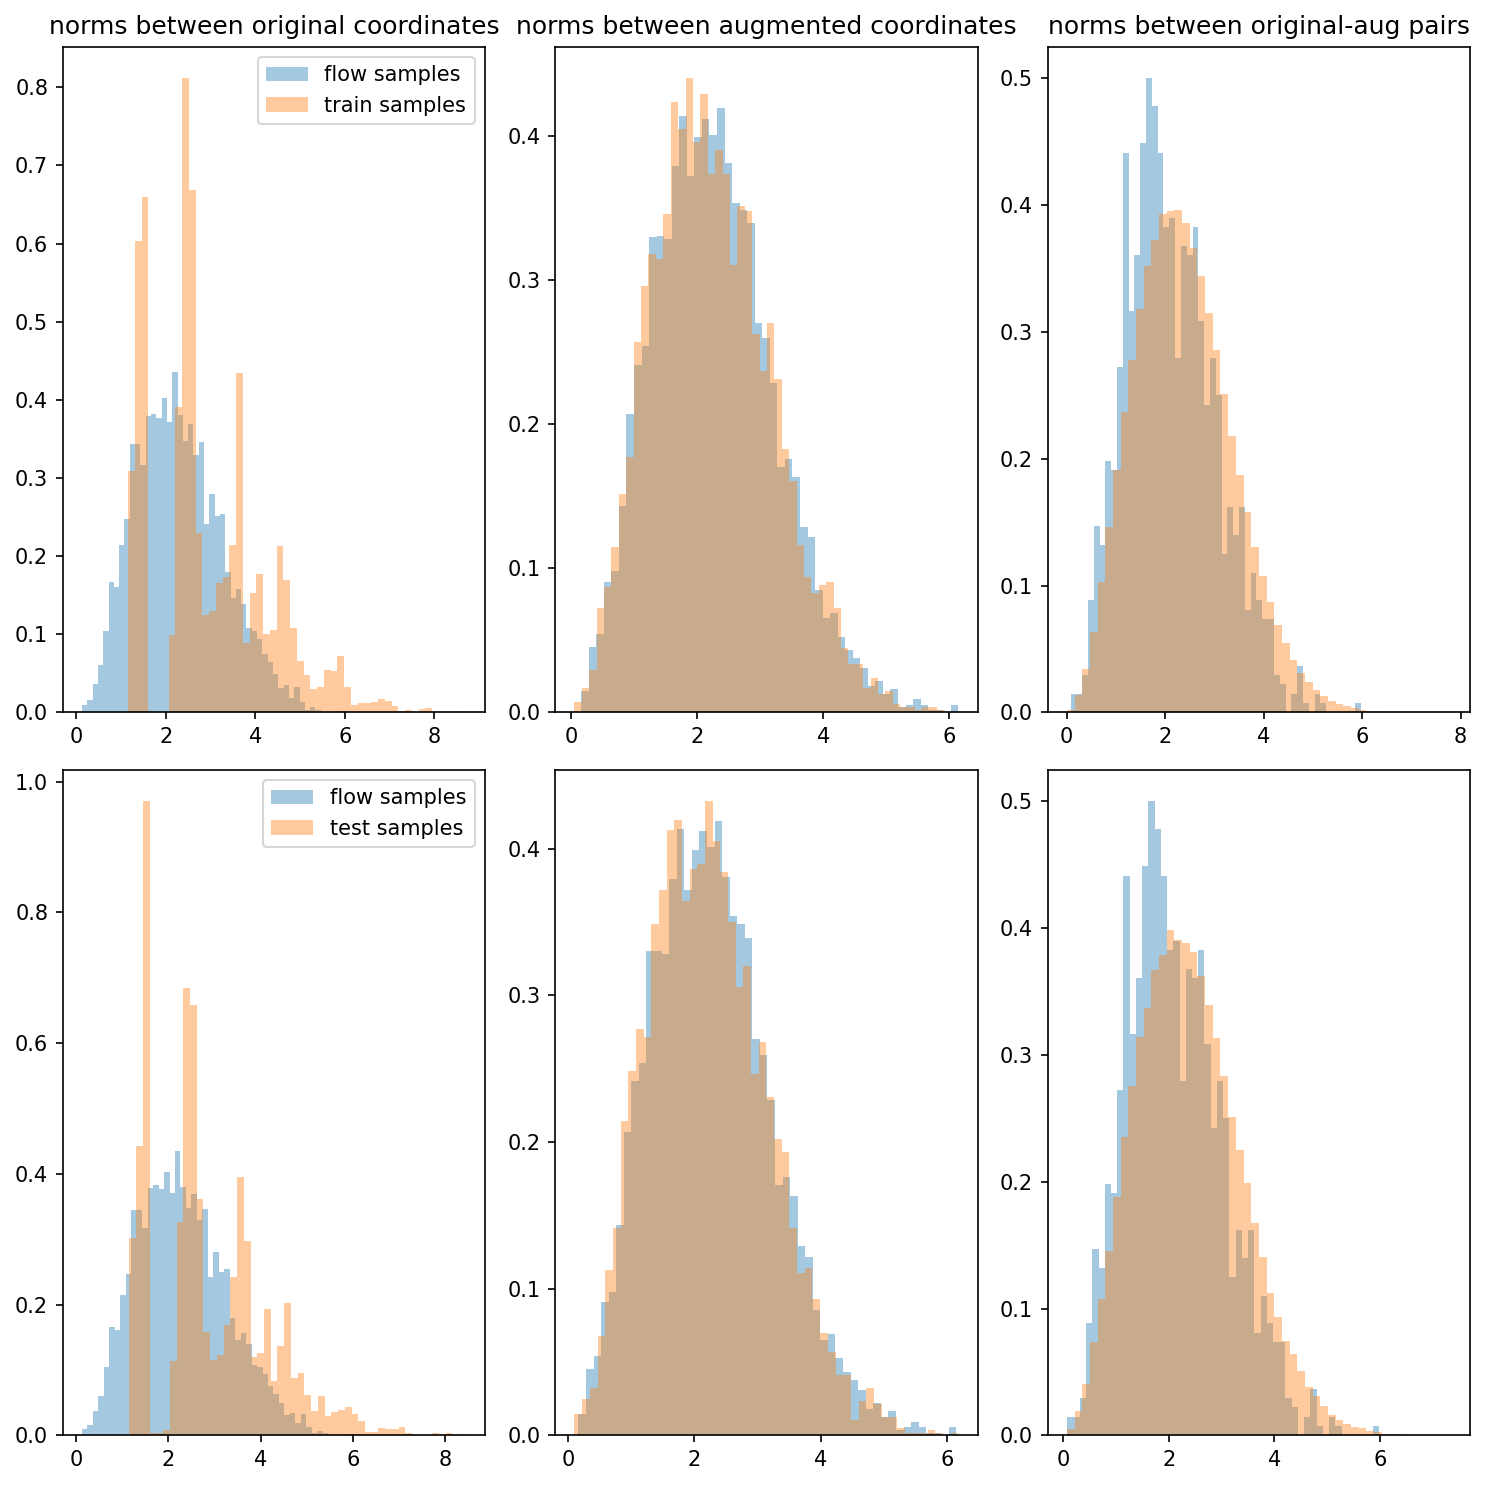

  0%|                                                    | 0/50 [00:00<?, ?it/s]

non numeric history values being saved


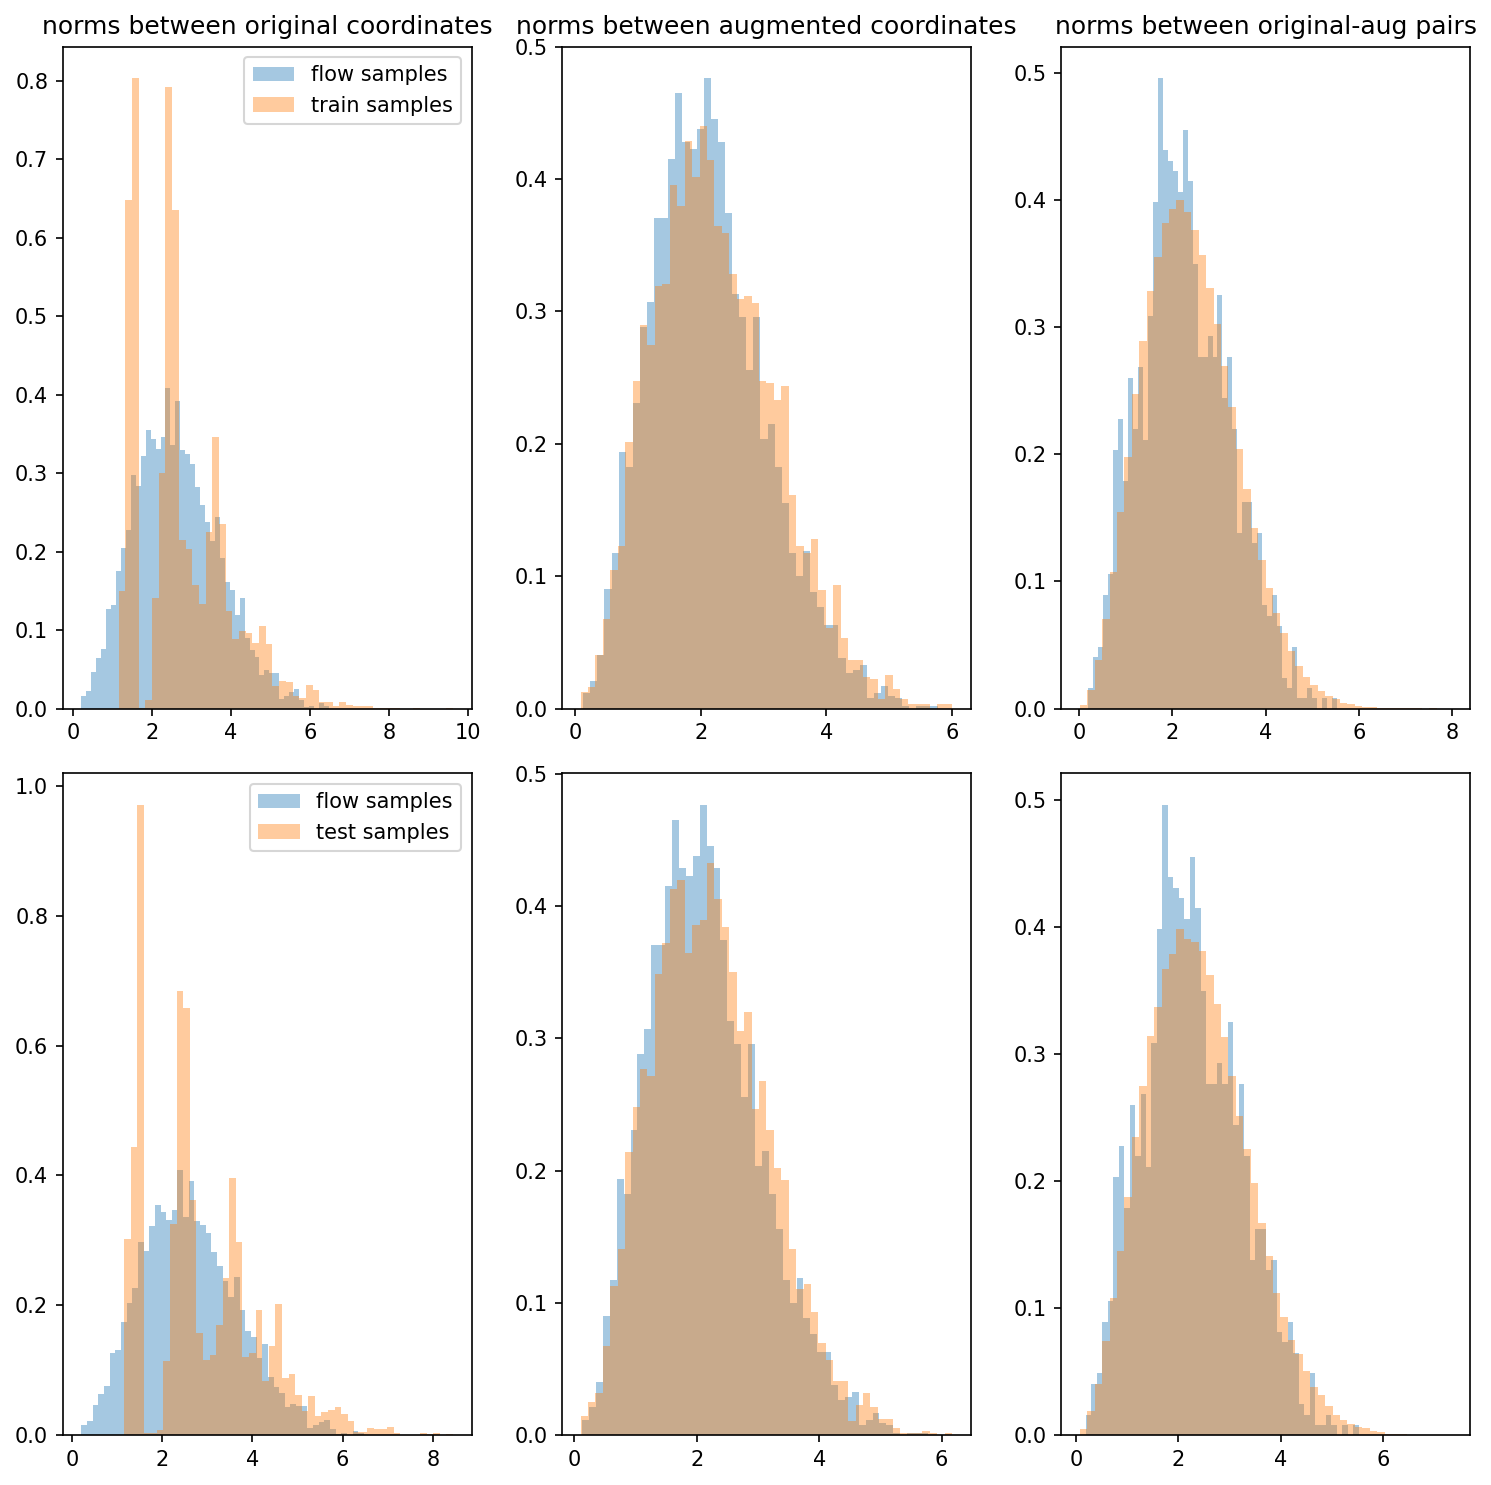

  2%|▉                                           | 1/50 [01:10<57:24, 70.29s/it]

{'eval_log_lik': Array(-73.23091, dtype=float32), 'eval_marginal_log_lik': Array(-36.2612, dtype=float32)}


 32%|█████████████▊                             | 16/50 [04:59<08:43, 15.40s/it]

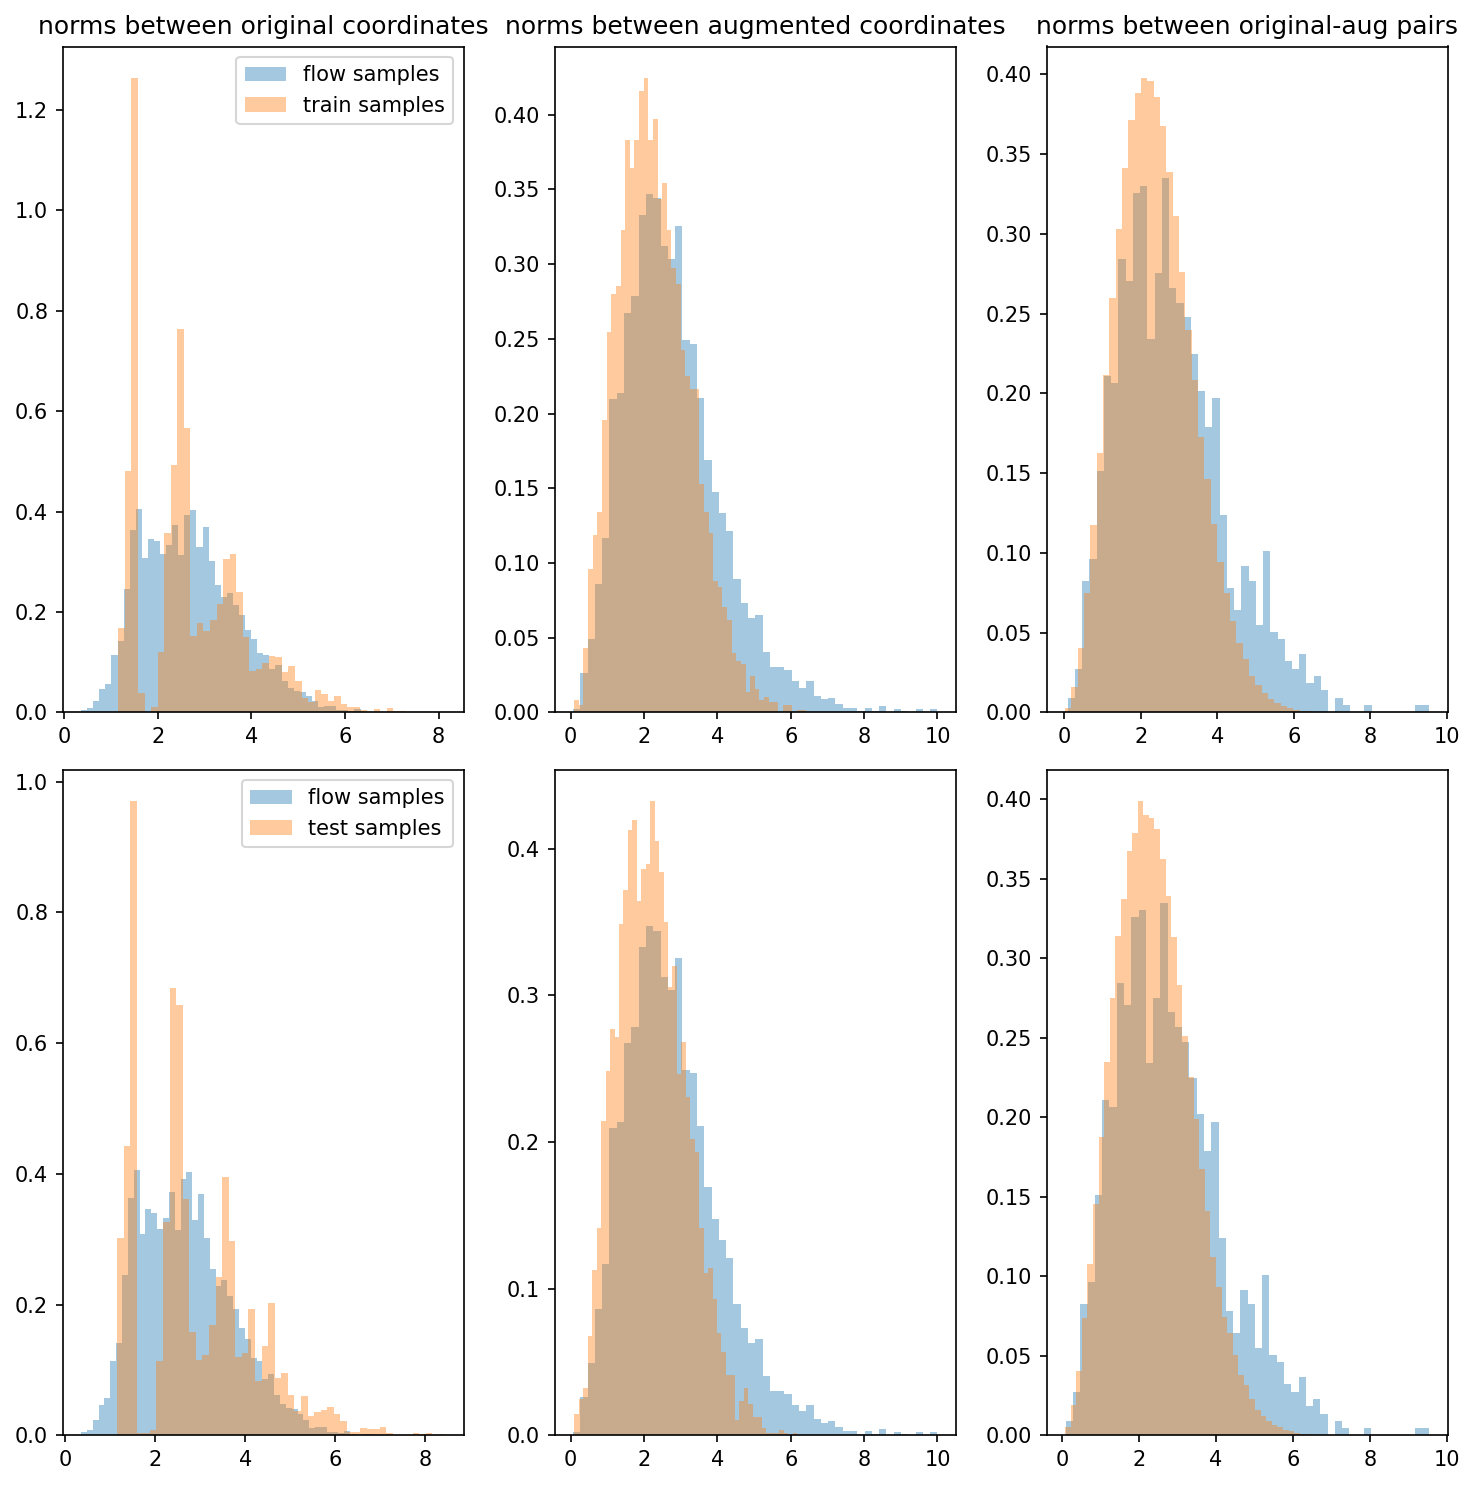

 34%|██████████████▌                            | 17/50 [05:46<13:41, 24.89s/it]

{'eval_log_lik': Array(-68.35344, dtype=float32), 'eval_marginal_log_lik': Array(-31.374105, dtype=float32)}


 64%|███████████████████████████▌               | 32/50 [09:36<04:36, 15.38s/it]

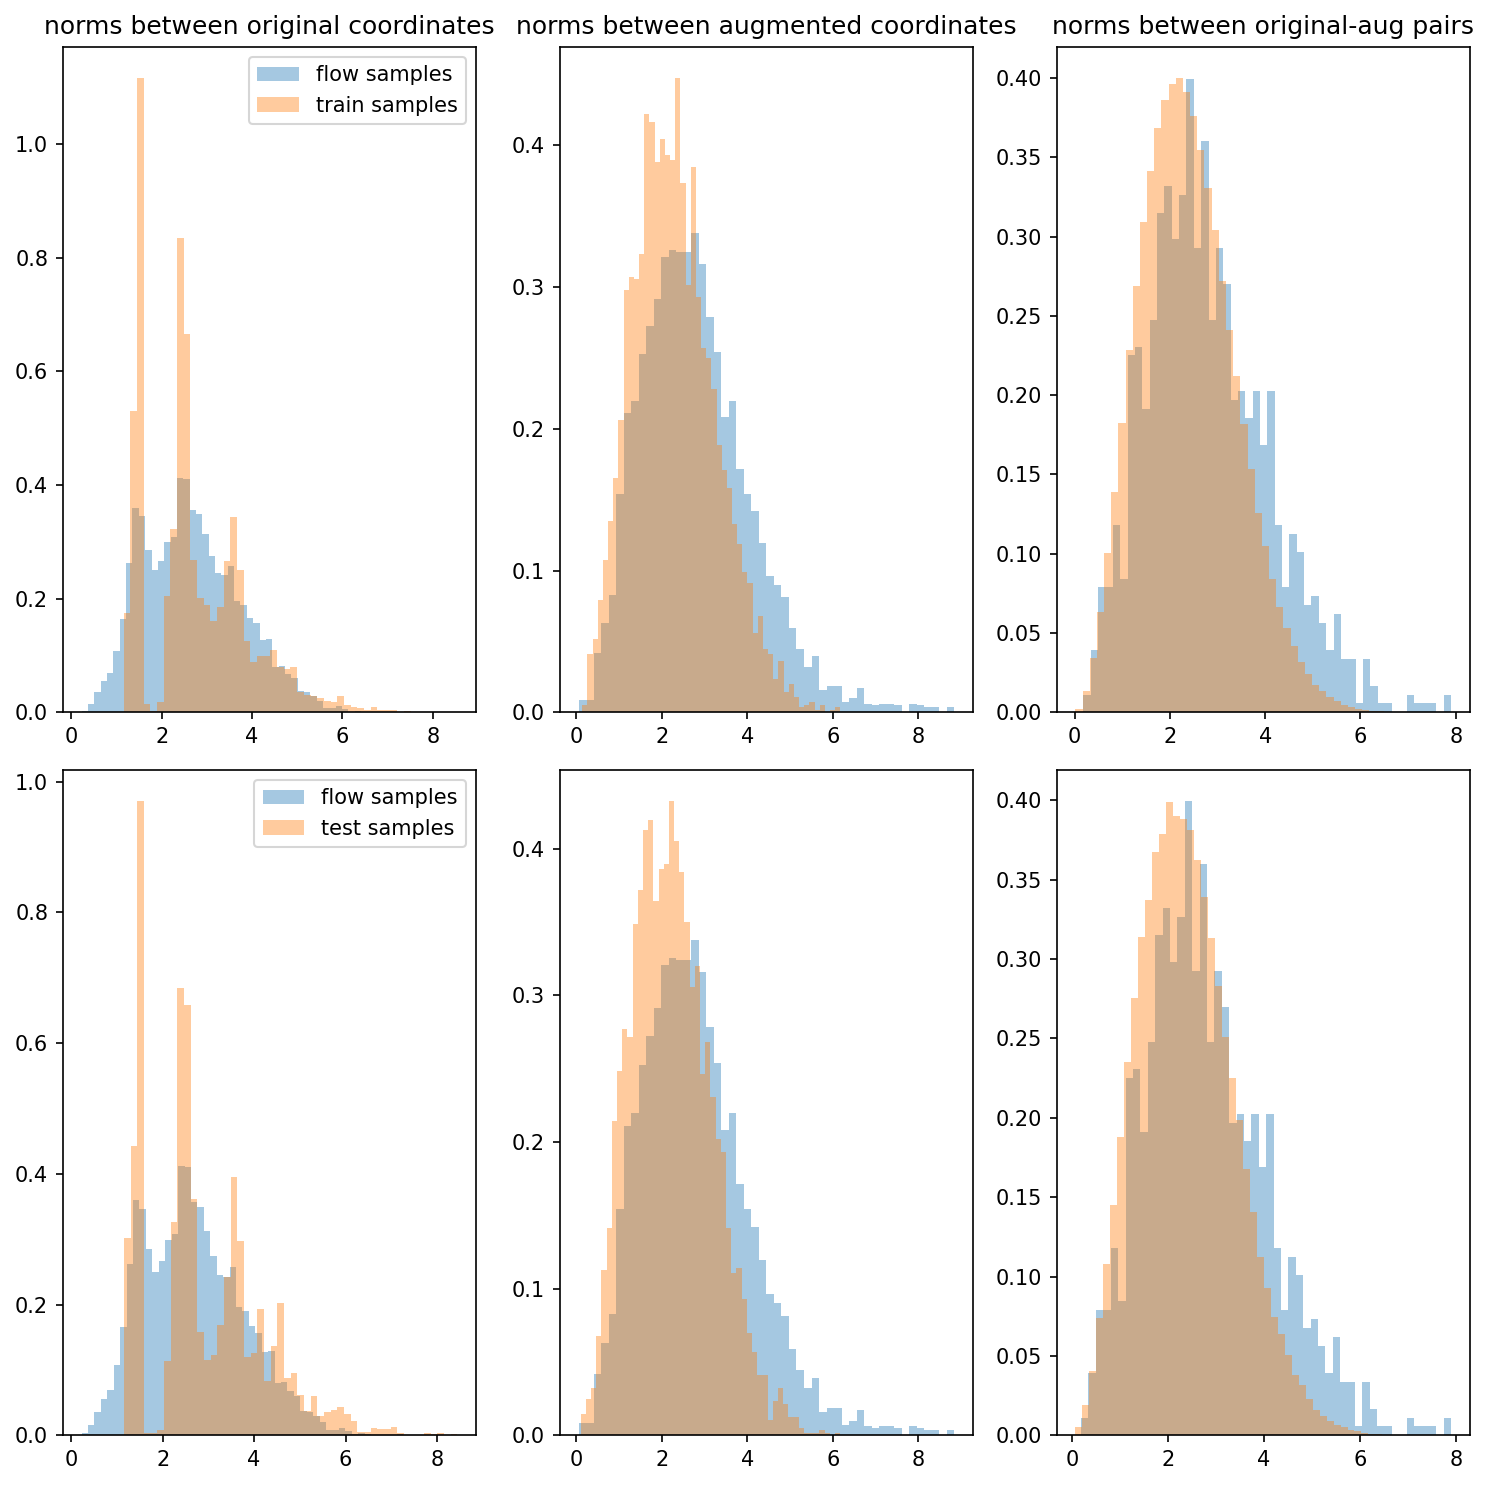

 66%|████████████████████████████▍              | 33/50 [10:23<07:01, 24.79s/it]

{'eval_log_lik': Array(-65.16151, dtype=float32), 'eval_marginal_log_lik': Array(-28.221798, dtype=float32)}


 98%|██████████████████████████████████████████▏| 49/50 [14:29<00:15, 15.38s/it]

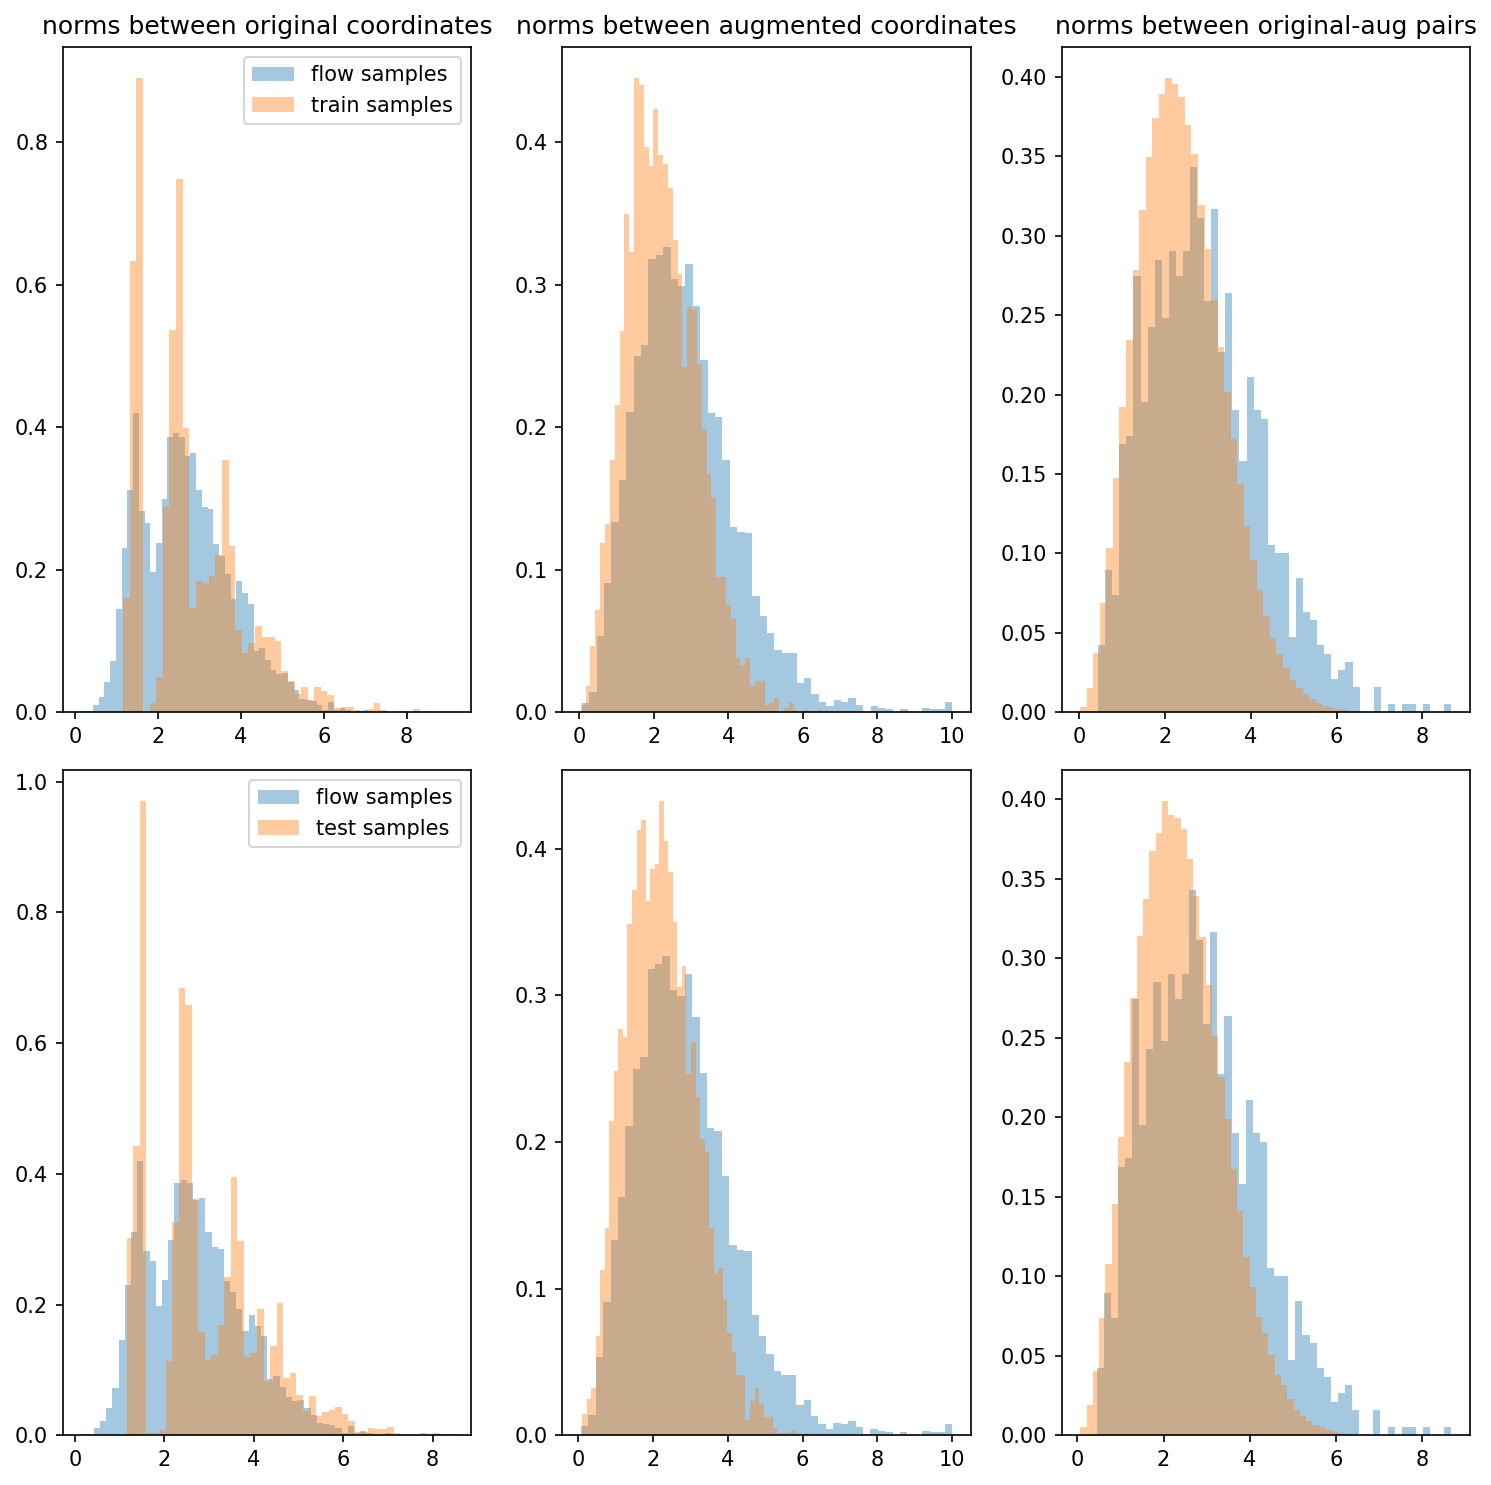

100%|███████████████████████████████████████████| 50/50 [15:16<00:00, 18.33s/it]


{'eval_log_lik': Array(-64.05872, dtype=float32), 'eval_marginal_log_lik': Array(-27.09824, dtype=float32)}


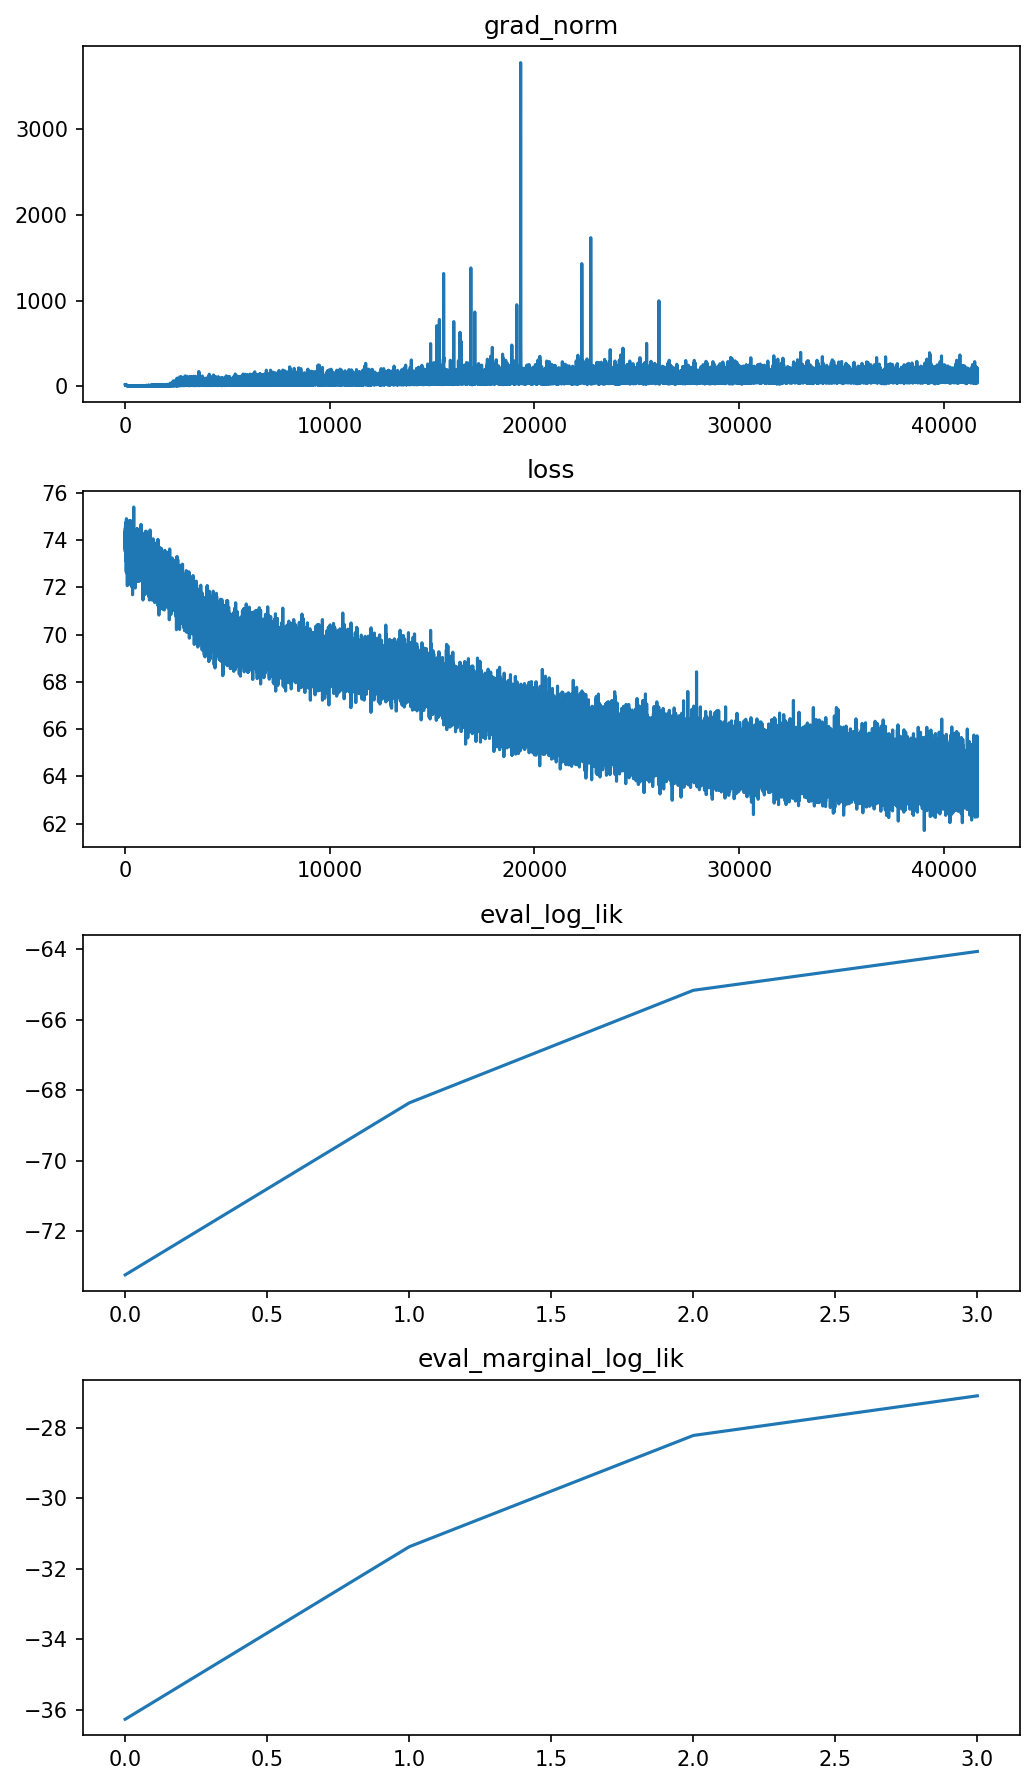

In [7]:
experiment_config = create_train_config(cfg, dim=3, n_nodes=9,
                                        load_dataset=load_dataset)

logger, params, log_prob_fn, sample_and_log_prob_fn = train(experiment_config)



In [8]:
logger.history['grad_norm'][-50:]

[182.28421020507812,
 134.56460571289062,
 135.35604858398438,
 69.34847259521484,
 126.33857727050781,
 121.60723876953125,
 112.9244155883789,
 87.72003936767578,
 114.1106185913086,
 107.19331359863281,
 61.5831413269043,
 71.41015625,
 155.21734619140625,
 72.55156707763672,
 41.61850357055664,
 123.14834594726562,
 108.14208221435547,
 55.18407440185547,
 81.23534393310547,
 58.092498779296875,
 86.31681823730469,
 68.5386962890625,
 84.57758331298828,
 50.566856384277344,
 110.17794036865234,
 105.98477172851562,
 33.63753128051758,
 102.3113784790039,
 191.29200744628906,
 71.29165649414062,
 97.7136459350586,
 77.67147827148438,
 97.87718963623047,
 104.73475646972656,
 57.139835357666016,
 41.22494888305664,
 53.60232925415039,
 80.07513427734375,
 215.9329376220703,
 80.05169677734375,
 92.88665771484375,
 117.38818359375,
 82.4294204711914,
 73.01290130615234,
 157.89610290527344,
 85.85286712646484,
 98.6890640258789,
 55.89302444458008,
 127.0850830078125,
 108.28205871582

In [9]:
train_data, test_data = load_dataset(batch_size=cfg.training.batch_size, train_set_size=1000, test_set_size=1000)
x = sample_and_log_prob_fn.apply(params, jax.random.PRNGKey(1), (512,))[0]

TypeError: load_dataset() got an unexpected keyword argument 'train_set_size'

In [ ]:
fig, axs = plt.subplots()
plot_sample_hist(test_data, axs, original_coords=True, label='test samples')
plot_sample_hist(train_data, axs, original_coords=True, label='train samples')
plot_sample_hist(x, axs, original_coords=True, label='flow samples')
axs.set_title("sample histogram")
axs.legend()

In [ ]:
eval_fn(params=params, x=test_data, flow_log_prob_fn=log_prob_fn,
                                flow_sample_and_log_prob_fn=sample_and_log_prob_fn,
                                target_log_prob=dw4.log_prob_fn,
                                key=jax.random.PRNGKey(1), batch_size=cfg.training.batch_size,
                                K=50)